<a href="https://colab.research.google.com/github/xxellcapittan/machineLearning/blob/master/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25.0 degrees Kelvin = -248.15 degrees celsius
12.0 degrees Kelvin = -261.15 degrees celsius
32.0 degrees Kelvin = -241.15 degrees celsius
0.0 degrees Kelvin = -273.15 degrees celsius
14.0 degrees Kelvin = -259.15 degrees celsius
18.0 degrees Kelvin = -255.15 degrees celsius
Finished training the model




Estas são as variáveis de camada: [array([[-9.674694]], dtype=float32), array([-30.661964], dtype=float32)]


Um experimento

Finished training the model
[[-173.15]]
Model predicts that 100 degrees Kelvin is: [[-173.15]] degrees Celsius
These are the l0 variables: [array([[ 0.7018989 ,  0.52818066,  0.19216506, -0.8014602 ]],
      dtype=float32), array([-5.077429 ,  6.044413 , -5.6315165, -6.4399943], dtype=float32)]
These are the l1 variables: [array([[-2.7919161 ,  2.1165233 , -1.5937984 , -2.576658  ],
       [ 1.4889619 , -1.0170363 ,  1.7286115 ,  0.39854583],
       [-1.7810086 ,  1.6341003 , -0.953006  , -1.5742514 ],
       [-0.4408822 ,  1.5117993 , -1.8778299 , -1.3106427 ]

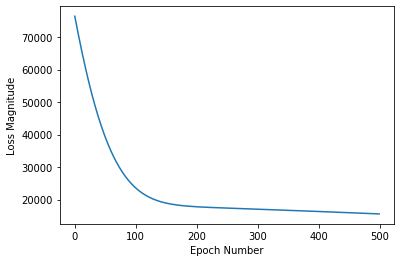

In [15]:
#as dependencias
from __future__ import absolute_import, division, print_function, unicode_literals
#using ternsorflow version 
%tensorflow_version 2.x

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#dados de treinamento
kelvin_k = np.array([25, 12, 32, 0, 14, 18], dtype=float) #features  
celsius_q = np.array([-248.15, -261.15, -241.15, -273.15, -259.15, -255.15], dtype=float) #labels

for i,c in enumerate(kelvin_k):
  print("{} degrees Kelvin = {} degrees celsius".format(c, celsius_q[i]))

#criação do modelo

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

#montar as camadas do modelo
model = tf.keras.Sequential([l0])

'''
Você verá frequentemente as camadas definidas dentro da definição do modelo, e não antes:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
'''
#Compile o modelo, com funções de perda e otimizador
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

'''
Você pode configurar Adam para o grau de "agressividade" com que o modelo será treinado
0.1 e 0.001 geralmente são suficientes
'''
#treinar o modelo
history = model.fit(kelvin_k, celsius_q, epochs=500, verbose=False)
print("Finished training the model")
print('\n')
# os argumentos são os INPUTS, e os argumentos secundários desejados são os OUTPUTS, verbose controla como será a saída 

#Usando MatPlotLib para exibir os resultados da acurácia do treinamento
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
print('\n')

#Uma visão do peso das camadas
print("Estas são as variáveis de camada: {}".format(l0.get_weights()))

print('\n')
print('Um experimento\n')
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(kelvin_k, celsius_q, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Kelvin is: {} degrees Celsius".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))